### Imports ###

In [1]:
import numpy as np
from numpy.random import normal, uniform

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# purely plot text color
params = {"text.color" : "orange",
          "xtick.color" : "orange",
          "ytick.color" : "orange",
          "axes.labelcolor" : "orange",
          "font.size": 12}
plt.rcParams.update(params)

In [4]:
# for cleaner cells output
import warnings
warnings.filterwarnings('ignore')

# Hand-Made KMeans #

In [5]:
def get_3_clusters_example():
    cluster_1 = normal(2, 0.5, (15, 2))
    cluster_2 = np.concatenate((np.expand_dims(normal(6, 0.6, 30), 1),
                            np.expand_dims(normal(4, 0.8, 30), 1)), axis=1)
    cluster_3 = np.concatenate((np.expand_dims(normal(8, 0.3, 22), 1),
                            np.expand_dims(normal(1.6, 0.6, 22), 1)), axis=1)
    cluster_3[:, 0] += cluster_3[:, 1] / 2
    return np.concatenate((cluster_1, cluster_2, cluster_3), axis=0)

In [6]:
data = get_3_clusters_example()

In [7]:
def plot_data(data, title='Plot'):
    sns.scatterplot(data[:, 0], data[:, 1])
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

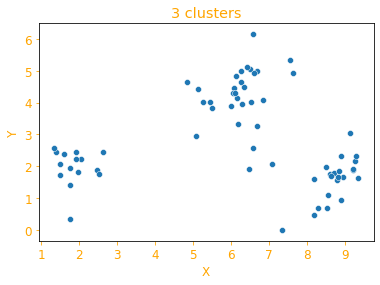

In [8]:
plot_data(data, '3 clusters')

In [9]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import euclidean

from matplotlib.pyplot import figure
import pandas as pd

In [10]:
class HM_KMeans:
    # HM for hand-made
    def __init__(self, k):
        self.k = k
    
    def plug_in_dataset(self, data):
        self.data = data
        min_bounds, max_bounds = data.min(axis=0), data.max(axis=0)
        # print(min_bounds, max_bounds)
        self.centroids = [np.random.uniform(min_bounds[idx], max_bounds[idx], self.k) for idx in range(len(min_bounds))]
        self.centroids = np.array(self.centroids).T
        # print(self.centroids)
        self.step = 0
        
    def one_step(self):
        self.step += 1
        # calculate all dists between centroids and data
        dists = distance_matrix(self.data, self.centroids)
        clusters = dists.argmin(axis=1)
        # set up plot
        df_to_plot = pd.DataFrame(np.concatenate((self.data, self.centroids)))
        df_to_plot.columns = ['0', '1']
        df_to_plot['Size'] = [3] * self.data.shape[0] + [9] * self.centroids.shape[0]
        df_to_plot['Clusters'] = np.concatenate((clusters, np.arange(self.k)))
        figure(figsize=(10, 6), dpi=80)
        sns.scatterplot(df_to_plot['0'], df_to_plot['1'], hue=df_to_plot['Clusters'], palette='tab10', size = df_to_plot['Size'], markers='$\circ$')
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.title('Visualizing step ' + str(self.step) + ' of KMeans algorithm')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
        # recalculate centroids
        diff = 0
        for x in range(self.k):
            new_coords = np.array([df_to_plot[df_to_plot['Clusters'] == x]['0'].mean(),
                                          df_to_plot[df_to_plot['Clusters'] == x]['1'].mean()])
            diff += euclidean(new_coords, self.centroids[x])
            self.centroids[x] = new_coords
        print('Centroids moved by', diff)

In [11]:
hm_kmeans = HM_KMeans(5)
hm_kmeans.plug_in_dataset(data)

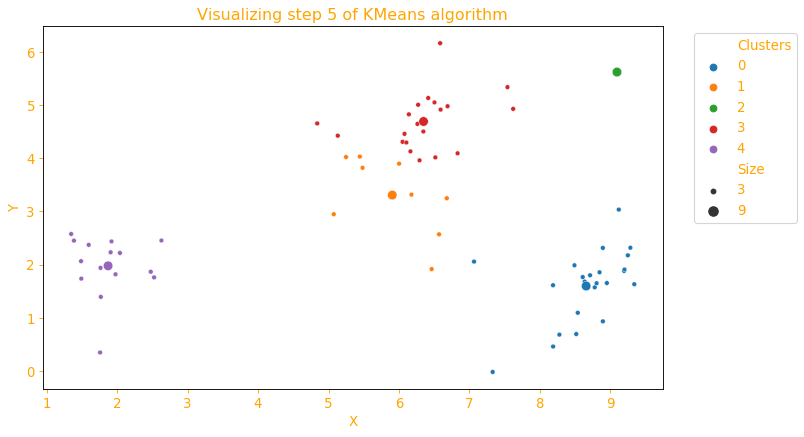

Centroids moved by 0.000307592687516172


In [16]:
hm_kmeans.one_step()

# KMeans & DBScan sklearn implementation #

Let's generate two separate clusters with a bridge connecting them

In [17]:
def get_bridge_example():
    cluster_1 = np.concatenate((np.expand_dims(normal(1, 0.3, 80), 1),
                            np.expand_dims(normal(2, 0.8, 80), 1)), axis=1)
    cluster_2 = np.concatenate((np.expand_dims(normal(4, 0.3, 50), 1),
                            np.expand_dims(normal(2, 0.8, 50), 1)), axis=1)
    bridge = np.concatenate((np.expand_dims(normal(2.5, 1, 30), 1),
                            np.expand_dims(normal(2, 0.1, 30), 1)), axis=1)
    return np.concatenate((cluster_1, cluster_2, bridge), axis=0)

In [18]:
data = get_bridge_example()

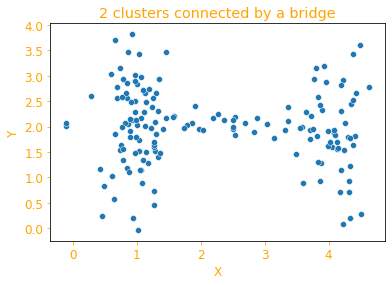

In [19]:
plot_data(data, '2 clusters connected by a bridge')

In [20]:
from sklearn.cluster import DBSCAN, KMeans

In [21]:
def plot_clustering(data, clusters, title='Clustering', palette='tab10'):
    sns.scatterplot(data[:, 0], data[:, 1], hue=clusters, palette=palette)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

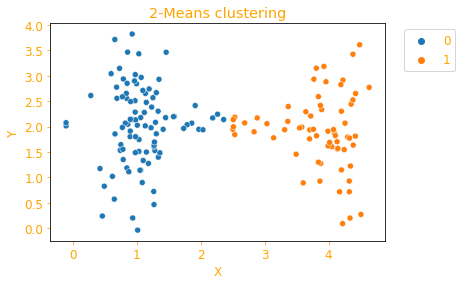

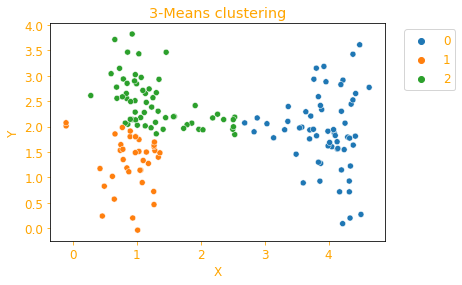

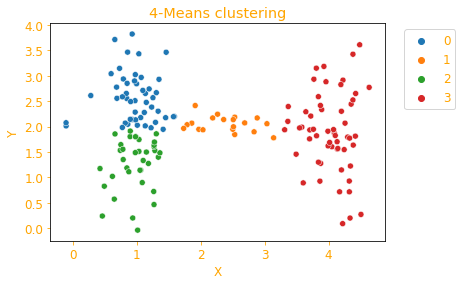

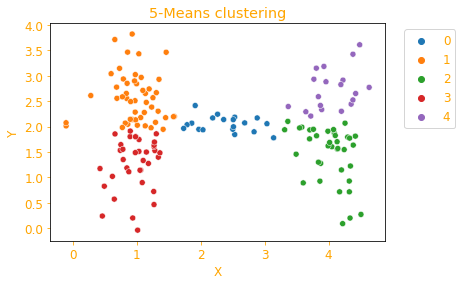

In [22]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    plot_clustering(data, kmeans.labels_,  str(k)+'-Means clustering')

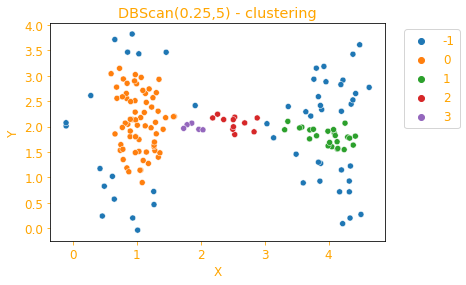

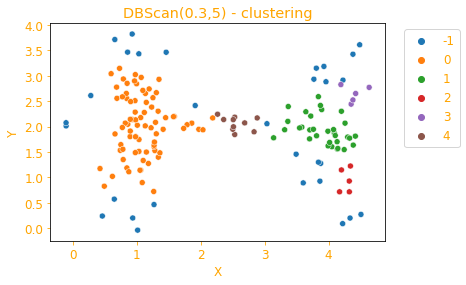

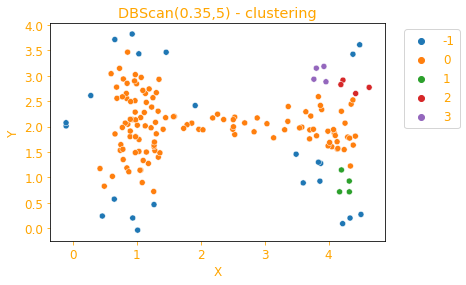

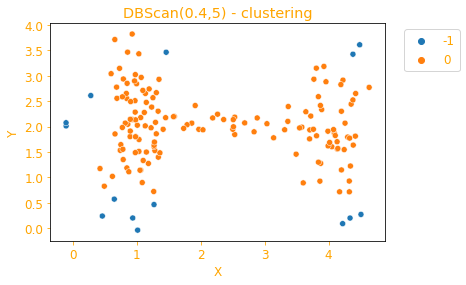

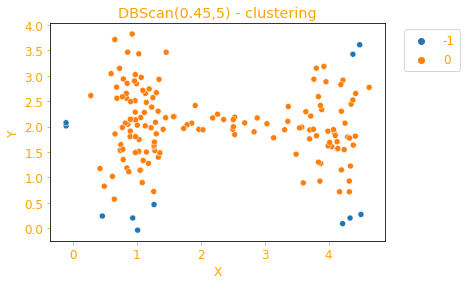

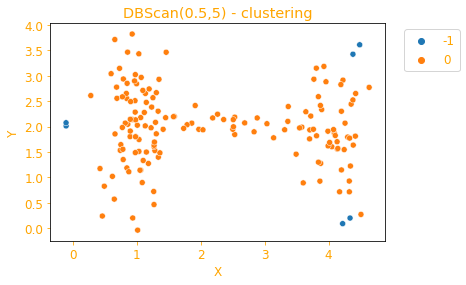

In [23]:
minPts = 5
for eps in np.linspace(0.25, 0.5, 6):
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    dbscan.fit(data)
    plot_clustering(data, dbscan.labels_, 'DBScan(' + str(round(eps, 2)) + ',5) - clustering')

In [24]:
data = np.array([[0, 0],
                 [0, 1],
                 [0, 2],
                 [0, 3],
                 [0, -1],
                 [0, -2],
                 [0, -3],
                 [1, 0],
                 [2, 0],
                 [3, 0],
                 [-1, 0],
                 [-2, 0],
                 [-3, 0]])

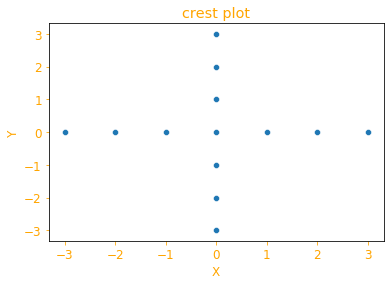

In [25]:
plot_data(data, 'crest plot')

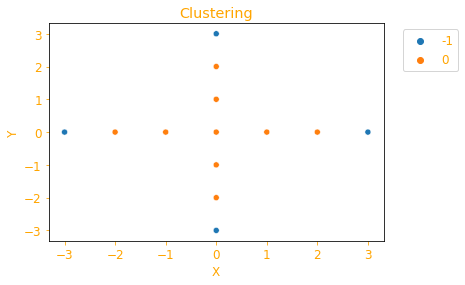

In [26]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data)
plot_clustering(data, dbscan.labels_)

# Outliers #

In [27]:
def get_3_clusters_outliers():
    cluster_1 = normal(2, 0.5, (15, 2))
    cluster_2 = np.concatenate((np.expand_dims(normal(6, 0.6, 30), 1),
                            np.expand_dims(normal(4, 0.8, 30), 1)), axis=1)
    cluster_3 = np.concatenate((np.expand_dims(normal(8, 0.3, 22), 1),
                            np.expand_dims(normal(1.6, 0.6, 22), 1)), axis=1)
    cluster_3[:, 0] += cluster_3[:, 1] / 2
    outliers = np.concatenate((np.expand_dims(normal(-13, 3, 2), 1),
                            np.expand_dims(normal(-2, 5, 2), 1)), axis=1)
    return np.concatenate((cluster_1, cluster_2, cluster_3, outliers), axis=0)

In [28]:
data = get_3_clusters_outliers()

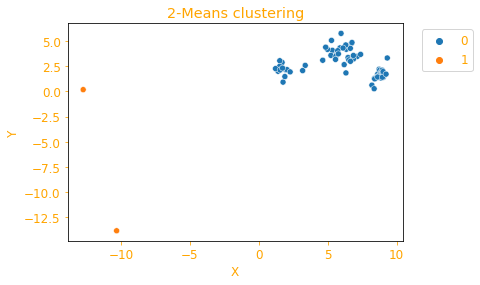

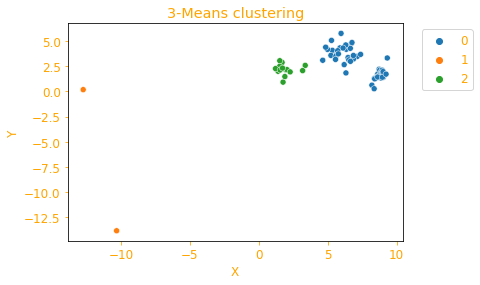

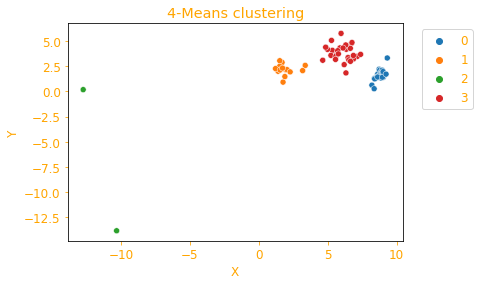

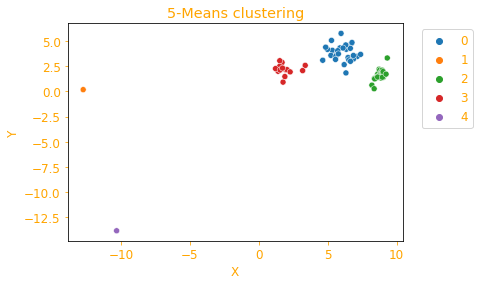

In [29]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    plot_clustering(data, kmeans.labels_,  str(k)+'-Means clustering')

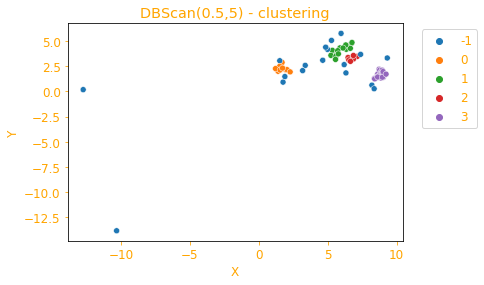

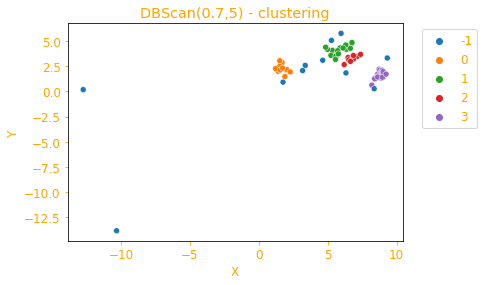

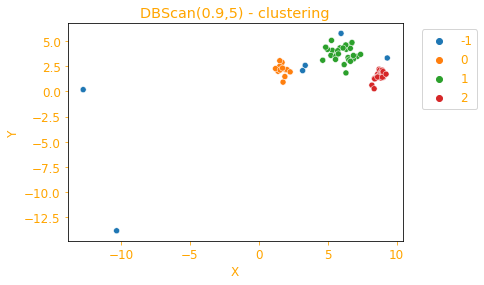

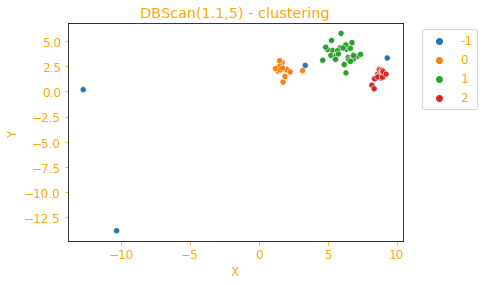

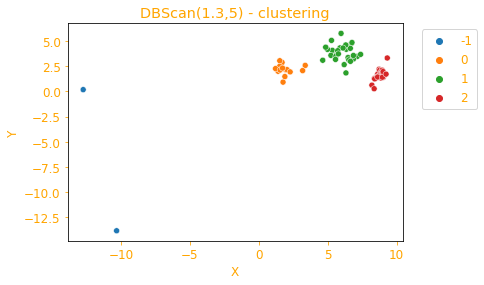

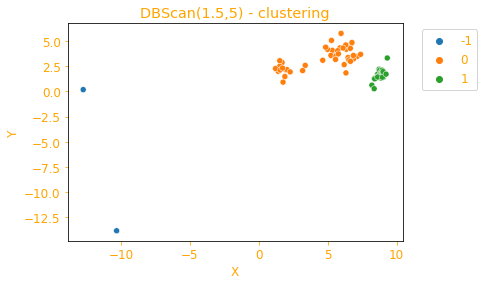

In [30]:
minPts = 5
for eps in np.linspace(0.5, 1.5, 6):
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    dbscan.fit(data)
    plot_clustering(data, dbscan.labels_, 'DBScan(' + str(round(eps, 2)) + ',5) - clustering')

# Algorithm comparison #

In [31]:
def get_data_huge_cluster():
    return normal(5, 2.5, (400, 2))

In [32]:
def get_data_n_gaussians(n):
    clusters = []
    for _ in range(n):
        center = uniform(-n ** 0.75 - 2, 2 + n ** 0.75, 2)
        cluster = np.concatenate((np.expand_dims(normal(center[0], 0.5, 50), 1),
                            np.expand_dims(normal(center[1], 0.5, 50), 1)), axis=1)
        clusters.append(cluster)
    return np.concatenate(clusters, axis=0)

In [33]:
def get_data_moon_crests():
    cluster_1 = np.concatenate((np.expand_dims(uniform(-1.2, 1.2, 350), 1),
                            np.expand_dims(normal(0, 0.1, 350), 1)), axis=1)
    cluster_1[:, 1] -= np.abs(cluster_1[:, 0]) ** 3
    cluster_1[:, 1] += 1
    cluster_2 = np.concatenate((np.expand_dims(uniform(-1.15, 1.15, 110), 1),
                            np.expand_dims(normal(0, 0.1, 110), 1)), axis=1)
    cluster_2[:, 1] += np.abs(cluster_2[:, 0]) ** 4
    cluster_2[:, 1] -= 1.5
    cluster_2[:, 0] += 1
    return np.concatenate((cluster_1, cluster_2), axis=0)

In [34]:
data_huge_cluster = get_data_huge_cluster()

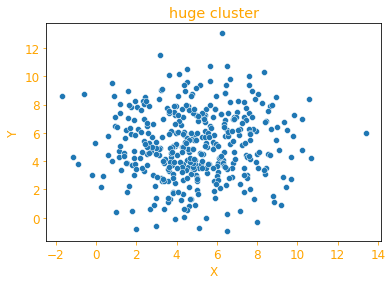

In [35]:
plot_data(data_huge_cluster, 'huge cluster')

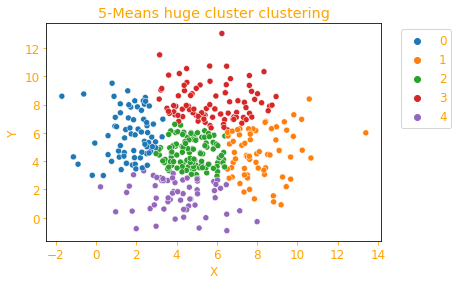

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_huge_cluster)
plot_clustering(data_huge_cluster, kmeans.labels_, str(5)+'-Means huge cluster clustering')

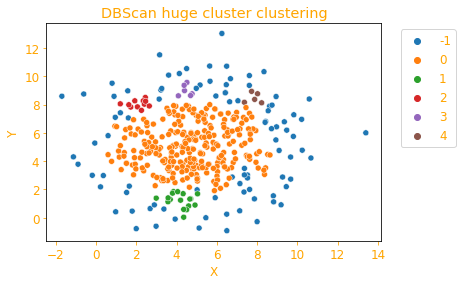

In [37]:
dbscan = DBSCAN(eps = 0.6, min_samples=5)
dbscan.fit(data_huge_cluster)
plot_clustering(data_huge_cluster, dbscan.labels_, 'DBScan huge cluster clustering')

In [38]:
data_n_gaussians = get_data_n_gaussians(17)

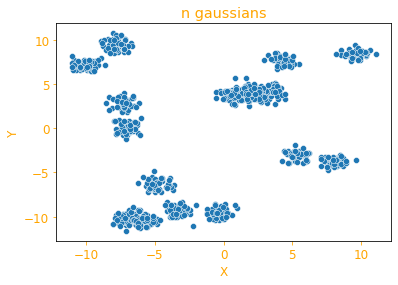

In [39]:
plot_data(data_n_gaussians, 'n gaussians')

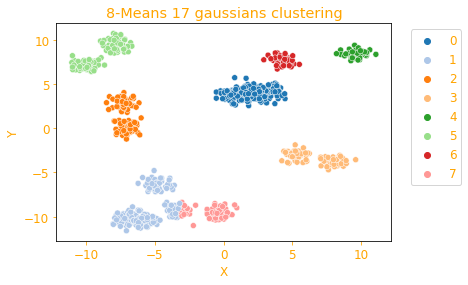

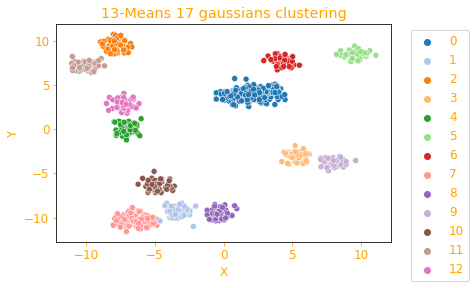

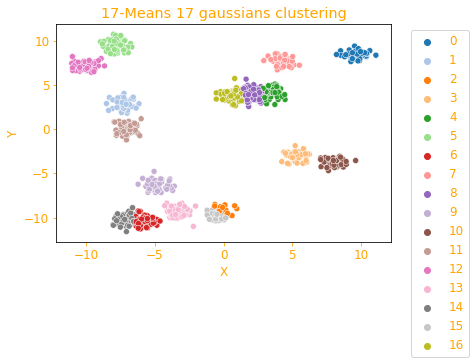

In [40]:
for k in [8, 13, 17]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_n_gaussians)
    plot_clustering(data_n_gaussians, kmeans.labels_, str(k)+'-Means 17 gaussians clustering', palette='tab20')

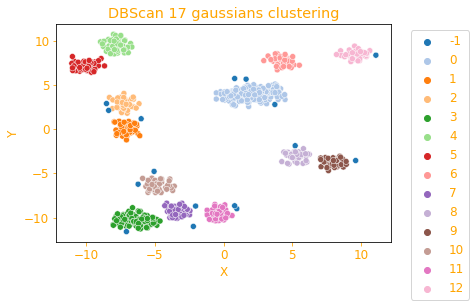

In [41]:
dbscan = DBSCAN(eps = 0.6, min_samples=5)
dbscan.fit(data_n_gaussians)
plot_clustering(data_n_gaussians, dbscan.labels_, 'DBScan 17 gaussians clustering', palette='tab20')

In [42]:
data_moon_crests = get_data_moon_crests()

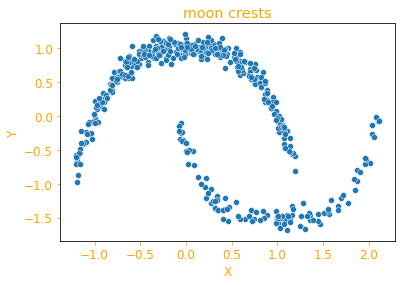

In [43]:
plot_data(data_moon_crests, 'moon crests')

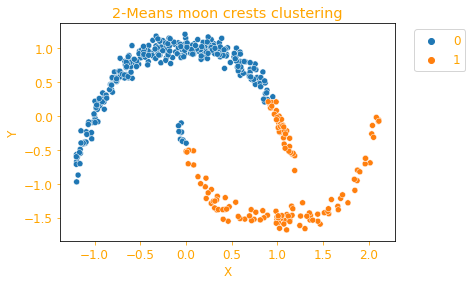

In [44]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_moon_crests)
plot_clustering(data_moon_crests, kmeans.labels_, '2-Means moon crests clustering')

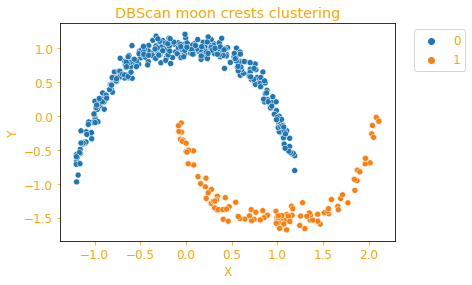

In [45]:
dbscan = DBSCAN(eps=0.4, min_samples=4)
dbscan.fit(data_moon_crests)
plot_clustering(data_moon_crests, dbscan.labels_, 'DBScan moon crests clustering')